In [1]:
from google.colab import drive
from google.colab import files
import requests
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv("drive/My Drive/Diploma/second_try/Code/other_language/poland/df_pl.csv")
# print(df.shape)
# df.head(2)

(6312, 25)


,Unnamed: 0,rev_page,page_title,date,same_day_revs,prev_day_revs,week_before_revs,month_before_revs,year_before_revs,week_after_revs,...,before,boost,same_day_views,prev_day_views,week_before_views,month_before_views,year_before_views,day_after_views,is_event,News Item
0,0,69,Alfabet,20220601,0.0,0.0,0.0,0.0,11.0,1.0,...,16,1.062500,-1,4,21,66,2019,3,0,-1
1,1,126,Albert_Einstein,20220601,0.0,0.0,0.0,4.0,154.0,5.0,...,69352,1.075412,15193,30202,114768,550384,6056336,30069,0,-1


In [4]:
# df = df[(~df.duplicated(subset='News Item'))|(df['News Item']=="-1")]

In [2]:
import pickle
xgb_model_loaded = pickle.load(open("drive/My Drive/Diploma/second_try/Code/other_language/xgb_model_en.pkl", "rb"))

In [ ]:
# #category
# df['subcategory'] = df['category'].str.split('.', 2, expand=True)[1]
# df['category']= df['category'].str.split('.', 2, expand=True)[0]
# df[['subcategory', 'category']] = df[['subcategory', 'category']].fillna(-2)

# df[["-1", "Culture",	"Geography",	"History_and_Society",	"STEM"]] = pd.get_dummies(df['category'])[["-1", "Culture",	"Geography",	"History_and_Society",	"STEM"]]
# df.head(3)

<ipython-input-5-5a2736098935>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['subcategory'] = df['category'].str.split('.', 2, expand=True)[1]
<ipython-input-5-5a2736098935>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['category']= df['category'].str.split('.', 2, expand=True)[0]


,Unnamed: 0,rev_page,page_title,date,same_day_revs,prev_day_revs,week_before_revs,month_before_revs,year_before_revs,week_after_revs,...,year_before_views,day_after_views,is_event,News Item,subcategory,-1,Culture,Geography,History_and_Society,STEM
0,0,69,Alfabet,20220601,0.0,0.0,0.0,0.0,11.0,1.0,...,2019,3,0,-1,Linguistics,0,1,0,0,0
1,1,126,Albert_Einstein,20220601,0.0,0.0,0.0,4.0,154.0,5.0,...,6056336,30069,0,-1,STEM*,0,0,0,0,1
2,2,127,Alfabet_grecki,20220601,0.0,0.0,0.0,1.0,31.0,2.0,...,-1,-1,0,-1,-2,1,0,0,0,0


In [ ]:
# # df[df.duplicated(subset=['page_title', 'date', 'is_event'], keep=False)][['page_title', 'date', 'is_event']]
# df = df.drop_duplicates(subset=['page_title', 'date'], keep='first')

In [ ]:
# !pip install -q swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.7 MB/s eta 0:00:00


In [ ]:
# import json
# import swifter
# import requests

# def get_topic(title):
#   try:
#     url = f'https://wikipedia-topic.wmcloud.org/api/v1/topic?lang=pl&title={title}'
#     r = requests.get(url).text
#     r = json.loads(r)['results'][0] # score, topic
#     a, b = r['score'], r['topic']
#   except:
#     a, b = -1, -1
#   return title, a, b

# a = "Alfabet_grecki"
# get_topic(a)

('Alfabet_grecki', 0.9967369437217712, 'Culture.Linguistics')

In [ ]:
# len(set(df['page_title'])), len(df)

(5077, 5206)

In [ ]:
# df_cat = pd.DataFrame(set(df['page_title']), columns=['page_title'])
# category = df_cat.swifter.apply(lambda x: get_topic(x['page_title']), axis=1) 

Pandas Apply:   0%|          | 0/5077 [00:00<?, ?it/s]

In [ ]:
# cat_upd = pd.DataFrame(category.tolist(), columns=['page_title', 'category_score_upd', 'category_upd'])
# cat_upd.head()

,page_title,category_score_upd,category_upd
0,Szymon_Szymański,0.930468,Culture.Sports
1,(42355)_Typhon,1.000010,STEM.STEM*
2,Loukas,-1.000000,-1
3,15_czerwca,-1.000000,-1
4,Miejskie_Przedsiębiorstwo_Komunikacyjne_–_Rzeszów,0.992664,History_and_Society.Transportation


In [ ]:
# df_upd = pd.merge(df, cat_upd, how="left", on=["page_title"])
# df_upd.shape

(5206, 33)

In [ ]:
# from google.colab import files
# df_upd.to_csv('features_pl_upd.csv')
# files.download('features_pl_upd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# df.to_csv('features_pl.csv')
# files.download('features_pl.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("drive/My Drive/Diploma/second_try/Code/analysis/features_pl_upd.csv")
df['category_score'] = df['category_score_upd']
df['category'] = df['category']
print(df.shape)
df.head(2)

(5206, 34)


,Unnamed: 0.1,Unnamed: 0,rev_page,page_title,date,same_day_revs,prev_day_revs,week_before_revs,month_before_revs,year_before_revs,...,is_event,News Item,subcategory,-1,Culture,Geography,History_and_Society,STEM,category_score_upd,category_upd
0,0,0,69,Alfabet,20220601,0.0,0.0,0.0,0.0,11.0,...,0,-1,Linguistics,0,1,0,0,0,0.999154,Culture.Linguistics
1,1,1,126,Albert_Einstein,20220601,0.0,0.0,0.0,4.0,154.0,...,0,-1,STEM*,0,0,0,0,1,0.969795,STEM.STEM*


In [4]:
def transform_category(X_train, col, df):
  mapping = dict(X_train.groupby(col)['category_score'].count()/len(X_train))
  return df[col].apply(lambda x: mapping.get(x, 0))

from sklearn.model_selection import train_test_split

# split data into train and test sets
seed = 7
test_size = 0.33
df_train, df_test = train_test_split(df, test_size=test_size, random_state=seed)
# split data into X and y
X_train = df_train[[ "-1", "Culture",	"Geography",	"History_and_Society",	"STEM",
       'category_score', 'category', 'subcategory',
       'before'  , 'prev_day_views', 'week_before_views', 'month_before_views', 'year_before_views', # 'same_day_views' - same day - do not use, cause it will be -1 for today (api not updated)
       'same_day_revs', 'prev_day_revs', 'week_before_revs', 'month_before_revs', 'year_before_revs' #'same_day_revs' = prev day views,  'day_after_revs'=same day - do not use
       ]]
X_test = df_test[[ "-1", "Culture",	"Geography",	"History_and_Society",	"STEM",
       'category_score', 'category', 'subcategory',
       'before'  ,
       'prev_day_views', 'week_before_views', 'month_before_views',
       'year_before_views', 'same_day_revs', 
       'prev_day_revs', 'week_before_revs', 'month_before_revs',
       'year_before_revs' # 'day_after_revs','same_day_views'
       ]]


y_train = df_train['is_event']
y_test = df_test['is_event']

In [5]:
X_train['category'] = transform_category(X_train, 'category', X_train)
X_train['subcategory'] = transform_category(X_train, 'subcategory', X_train)

X_test['category'] = transform_category(X_train, 'category', X_test)
X_test['subcategory'] = transform_category(X_train, 'subcategory', X_test)

<ipython-input-5-d3a63f9193c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['category'] = transform_category(X_train, 'category', X_train)
<ipython-input-5-d3a63f9193c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['subcategory'] = transform_category(X_train, 'subcategory', X_train)
<ipython-input-5-d3a63f9193c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [6]:
X_train['part_views_week'] = X_train['prev_day_views']/ X_train['week_before_views']
X_train['part_views_month'] = X_train['prev_day_views']/ X_train['month_before_views']
X_train['part_revs_week'] = X_train['prev_day_revs']/ X_train['week_before_revs']
X_train['part_revs_month'] = X_train['prev_day_revs']/ X_train['month_before_revs']

<ipython-input-6-08f180ad9ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['part_views_week'] = X_train['prev_day_views']/ X_train['week_before_views']
<ipython-input-6-08f180ad9ab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['part_views_month'] = X_train['prev_day_views']/ X_train['month_before_views']
<ipython-input-6-08f180ad9ab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [7]:
X_test['part_views_week'] = X_test['prev_day_views']/ X_test['week_before_views']
X_test['part_views_month'] = X_test['prev_day_views']/ X_test['month_before_views']
X_test['part_revs_week'] = X_test['prev_day_revs']/ X_test['week_before_revs']
X_test['part_revs_month'] = X_test['prev_day_revs']/ X_test['month_before_revs']

<ipython-input-7-0ee5a3428f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['part_views_week'] = X_test['prev_day_views']/ X_test['week_before_views']
<ipython-input-7-0ee5a3428f2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['part_views_month'] = X_test['prev_day_views']/ X_test['month_before_views']
<ipython-input-7-0ee5a3428f2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

# Xgb loaded

In [8]:
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc, roc_curve


def plot_res(y_test, y_pred):
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  fig = px.area(
      x=recall, y=precision,
      title=f"Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})",
      labels=dict(x='Recall', y='Precision'),
      width=700, height=500
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=1, y1=0
  )
  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')

  fig.show()

In [9]:
# First XGBoost model 
from xgboost import XGBClassifier

In [10]:
y_pred_load = xgb_model_loaded.predict_proba(X_test)[:, 1]
y_pred_load

array([0.10150887, 0.290833  , 0.00928456, ..., 0.01801211, 0.00080013,
       0.00039543], dtype=float32)

In [11]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.4 MB/s eta 0:00:00


 96%|=================== | 1648/1718 [00:11<00:00]       

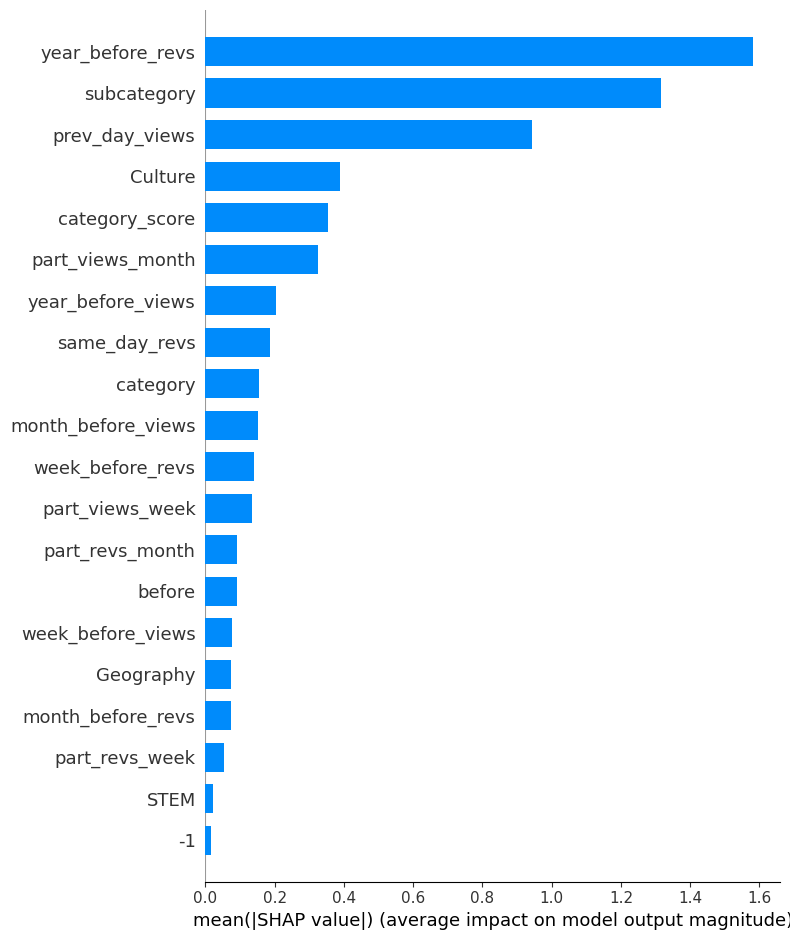

In [16]:
import shap
explainer = shap.Explainer(xgb_model_loaded, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

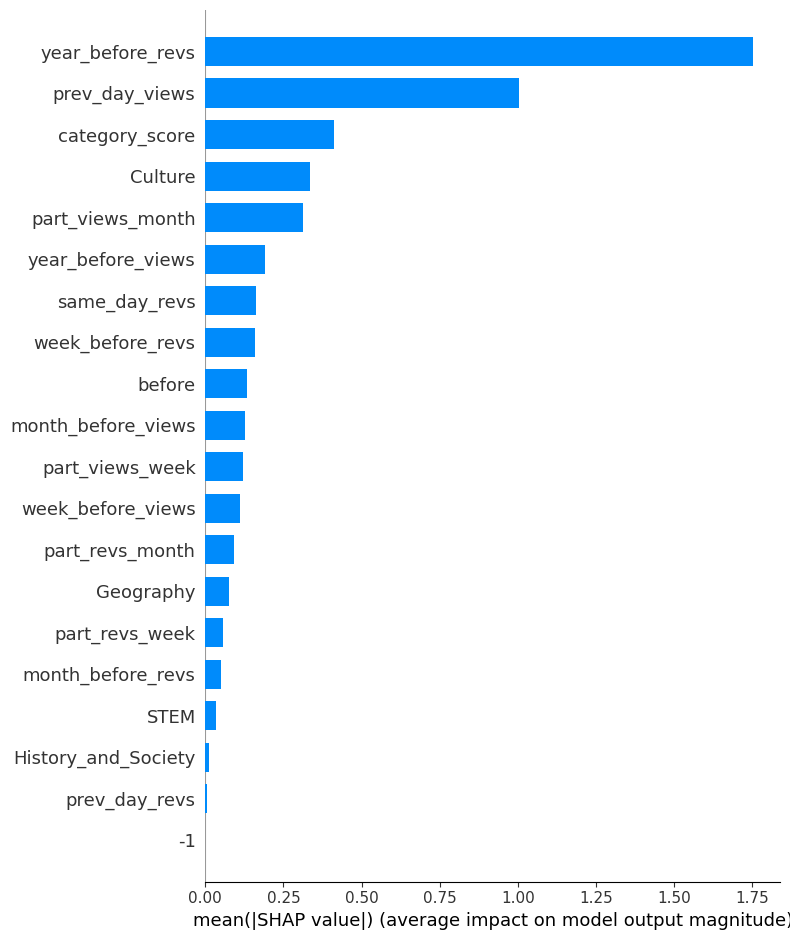

In [14]:
explainer = shap.Explainer(xgb_model_loaded, X_test, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [17]:
import numpy as np
feature_names = X_train.columns


rf_resultX = pd.DataFrame(shap_values.values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['col_name'],
                               ascending=False, inplace=True)
shap_importance#.head(10)

,col_name,feature_importance_vals
12,year_before_views,0.205436
17,year_before_revs,1.580277
10,week_before_views,0.077372
15,week_before_revs,0.140799
7,subcategory,1.316770
13,same_day_revs,0.186066
9,prev_day_views,0.943186
14,prev_day_revs,0.003680
18,part_views_week,0.133296
19,part_views_month,0.325961


In [15]:
import numpy as np
feature_names = X_train.columns


rf_resultX = pd.DataFrame(shap_values.values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head(10)

,col_name,feature_importance_vals
17,year_before_revs,1.750893
9,prev_day_views,1.004535
5,category_score,0.411559
1,Culture,0.334413
19,part_views_month,0.313150
12,year_before_views,0.191340
13,same_day_revs,0.160994
15,week_before_revs,0.158696
8,before,0.133715
11,month_before_views,0.126114


In [14]:
plot_res(y_test, y_pred_load)

In [15]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score

# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)

pred = [y_pred_load, 
        (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0),
        (X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0)]
names = ['model', 'views', 'revs']
for i in range(3):
    y_true = y_test
    y_score = pred[i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = names[i]
    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

# Loaded without category

In [16]:
import pickle
xgb_model_loaded_without_cat = pickle.load(open("drive/My Drive/Diploma/second_try/Code/models/xgb_model_en_without_category_norm.pkl", "rb"))

In [17]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import numpy as np

col = [ 'before', 'prev_day_views',
       'week_before_views', 'month_before_views', 'year_before_views',
       'same_day_revs', 'prev_day_revs', 'week_before_revs',
       'month_before_revs', 'year_before_revs', 'part_views_week',
       'part_views_month', 'part_revs_week', 'part_revs_month']

X_train_min = X_train
X_test_min = X_test
for i in col:
  scaler = MinMaxScaler()
  scaler.fit(np.array(X_train[i]).reshape(-1, 1))
  X_train_min[i] = scaler.transform(np.array(X_train[i]).reshape(-1, 1))
  X_test_min[i] = scaler.transform(np.array(X_test[i]).reshape(-1, 1))

<ipython-input-17-d2c3df287718>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-d2c3df287718>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-d2c3df287718>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-d2c3

In [18]:
# fit model no training data
xgb_model_loaded_without_cat.fit(X_train_min[col], y_train)
# make predictions for test data
y_pred_no_cat = xgb_model_loaded_without_cat.predict_proba(X_test_min[col])[:, 1]

# New model

In [18]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred_ge = model.predict_proba(X_test)[:, 1]
y_pred_ge

array([8.9976162e-01, 3.6499150e-02, 1.8199136e-03, ..., 7.4909893e-03,
       4.6879303e-04, 6.2355502e-05], dtype=float32)

 89%|==================  | 1527/1718 [00:12<00:01]       

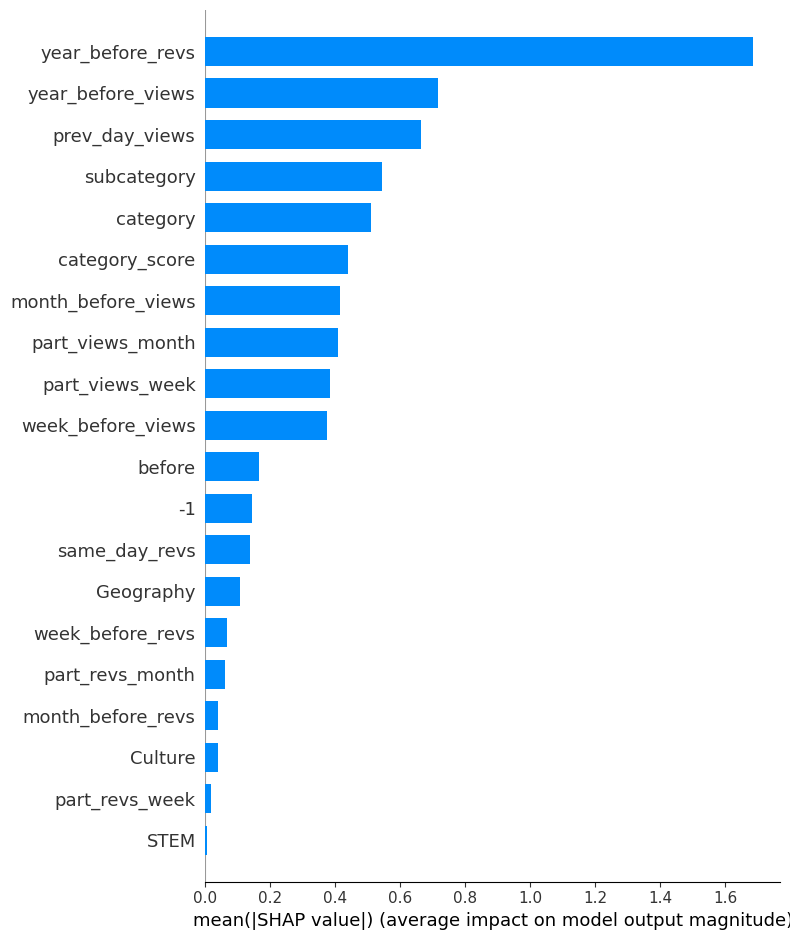

In [19]:
import shap
explainer = shap.Explainer(model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [20]:
import numpy as np
feature_names = X_train.columns


rf_resultX = pd.DataFrame(shap_values.values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['col_name'],
                               ascending=False, inplace=True)
shap_importance#.head(10)

,col_name,feature_importance_vals
12,year_before_views,0.714504
17,year_before_revs,1.684084
10,week_before_views,0.375489
15,week_before_revs,0.067861
7,subcategory,0.542733
13,same_day_revs,0.137464
9,prev_day_views,0.663875
14,prev_day_revs,0.000208
18,part_views_week,0.383447
19,part_views_month,0.407152


In [23]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score
fig = go.Figure()


pred = [y_pred_no_cat,y_pred_ge,y_pred_load, 
        (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0),
        (X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0)]
names = ['model_english_no_category','model_polish',  'model_english', 'views', 'revs']
for i in range(4):
    y_true = y_test
    y_score = pred[i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = names[i]

    if i<3:
      dash='solid'
    else:
      dash='dash'
    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines', line=go.scatter.Line(dash=dash)))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

# PR curve explanation

In [33]:
for i in range(len(_)):
  print(i, np.round(_[i], 4))
  print(np.round(precision[i], 2), np.round(recall[i], 2))

0 0.0
0.09 1.0
1 0.0
0.14 0.47
2 0.0
0.14 0.46
3 0.0
0.14 0.45
4 0.0
0.15 0.45
5 0.0
0.15 0.45
6 0.0
0.16 0.44
7 0.0
0.16 0.44
8 0.0
0.16 0.44
9 0.0
0.17 0.44
10 0.0
0.17 0.44
11 0.0
0.17 0.43
12 0.0
0.18 0.43
13 0.0
0.18 0.42
14 0.0
0.18 0.42
15 0.0
0.18 0.42
16 0.0
0.18 0.41
17 0.0
0.18 0.41
18 0.0
0.18 0.41
19 0.0
0.19 0.41
20 0.0
0.19 0.41
21 0.0
0.19 0.41
22 0.0
0.19 0.41
23 0.0
0.19 0.41
24 0.0
0.19 0.4
25 0.0
0.19 0.4
26 0.0
0.19 0.39
27 0.0
0.19 0.39
28 0.0
0.2 0.39
29 0.0
0.19 0.38
30 0.0
0.19 0.38
31 0.0
0.2 0.38
32 0.0
0.19 0.37
33 0.0
0.19 0.37
34 0.0
0.2 0.37
35 0.0
0.2 0.37
36 0.0
0.2 0.37
37 0.0
0.2 0.37
38 0.0
0.2 0.37
39 0.0
0.2 0.37
40 0.0
0.21 0.37
41 0.0
0.2 0.37
42 0.0001
0.21 0.37
43 0.0001
0.2 0.36
44 0.0001
0.21 0.36
45 0.0001
0.21 0.36
46 0.0001
0.21 0.36
47 0.0001
0.21 0.36
48 0.0001
0.21 0.36
49 0.0001
0.21 0.36
50 0.0001
0.21 0.36
51 0.0001
0.21 0.36
52 0.0001
0.21 0.36
53 0.0001
0.22 0.36
54 0.0001
0.22 0.36
55 0.0001
0.22 0.36
56 0.0001
0.22 0.36
57 0.0001

In [ ]:
threashold
presicion recall

287 1.0
1.0 0.0

280
0.38 0.02 0.06922

277
0.55 0.04 0.04727

<Axes: title={'center': 'threashold = 0.0'}>

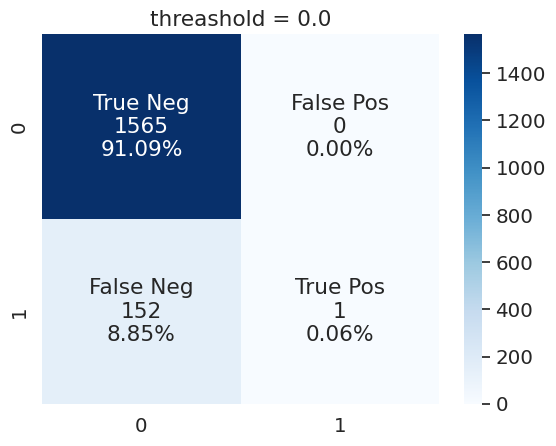

In [35]:
y_views = (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0)
threashold = 1.0
y_views = [int(value>=threashold) for value in y_views]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
cf_matrix = confusion_matrix(y_test, y_views)

ax = plt.axes()
ax.set_title('threashold = 0.0')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

<Axes: title={'center': 'threashold = 0.13'}>

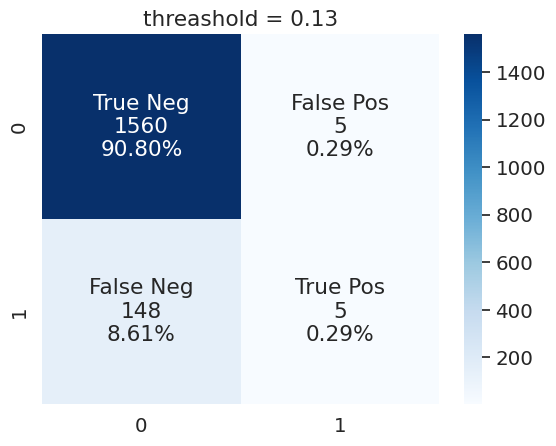

In [36]:
y_views = (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0)
threashold = 0.06#922
y_views = [int(value>threashold) for value in y_views]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
cf_matrix = confusion_matrix(y_test, y_views)

ax = plt.axes()
ax.set_title('threashold = 0.13')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

<Axes: title={'center': 'threashold = 0.13'}>

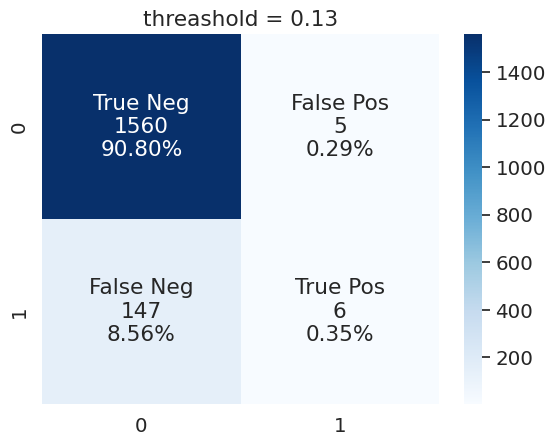

In [39]:
y_views = (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0)
threashold = 0.047#27
y_views = [int(value>threashold) for value in y_views]

sns.set(font_scale=1.3)
cf_matrix = confusion_matrix(y_test, y_views)

ax = plt.axes()
ax.set_title('threashold = 0.13')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)

# SHAP

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.9 MB/s eta 0:00:00


 99%|===================| 1703/1718 [00:15<00:00]       

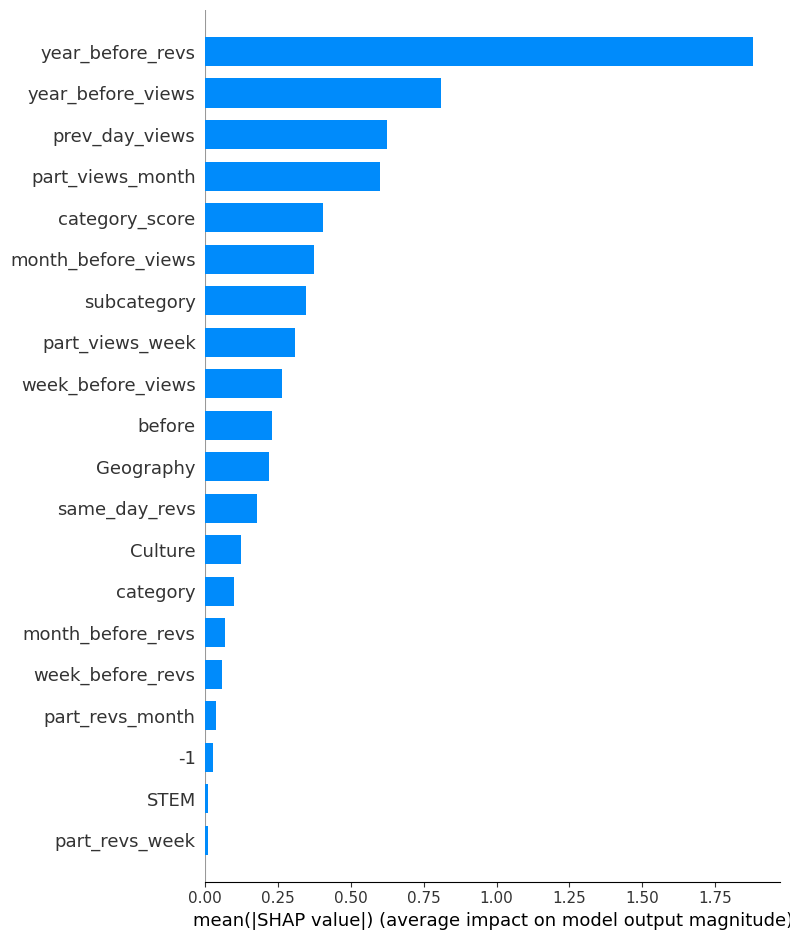

In [ ]:
import shap
explainer = shap.Explainer(model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Table scores

In [40]:
!pip install -q binclass-tools

In [47]:
import numpy as np
import bctools as bc
threshold_values = np.arange(0, 1, 0.01)
res_1 = bc.thresholds.get_ghost_optimal_thresholds_df(
    optimize_threshold = 'all',
    threshold_values = threshold_values,
    true_y = list(y_test),
    predicted_proba = y_pred_no_cat,
    N_subsets = 70,
    subsets_size = 0.2,
    with_replacement = False, 
    
    random_state = 120)
res_1

,optimized_metric,GHOST_optimal_threshold
0,kappa,0.34
1,mcc,0.52
2,f1_score,0.34
3,f2_score,0.14
4,f05_score,0.55


In [49]:
res_1[res_1['optimized_metric']=='f1_score']['GHOST_optimal_threshold'].iloc[0]

0.34

In [72]:
import numpy as np
import bctools as bc
from sklearn.metrics import accuracy_score, classification_report

y_pred_pl = y_pred_ge
pred = [y_pred_no_cat,y_pred_pl,y_pred_load, 
        (X_test['prev_day_views']/max(X_test['prev_day_views'])).fillna(0),
        (X_test['same_day_revs']/max(X_test['same_day_revs'])).fillna(0)]
names = ['model_english_no_category','model_polish',  'model_english', 'views', 'revs']
for i in range(5):
  print(names[i])
  y_predicted_temp = pred[i]


  threshold_values = np.arange(0, 1, 0.01)
  res_1 = bc.thresholds.get_ghost_optimal_thresholds_df(
      optimize_threshold = 'Fscore',
      threshold_values = threshold_values,
      true_y = list(y_test),
      predicted_proba = list(y_predicted_temp),
      N_subsets = 70,
      subsets_size = 0.2,
      with_replacement = False, 
      random_state = 120)
  res_1 = res_1[res_1['optimized_metric']=='f1_score']['GHOST_optimal_threshold'].iloc[0]
  print(res_1)


  threshold_values = np.arange(res_1-0.01, res_1+0.01, 0.0001)
  res_2 = bc.thresholds.get_ghost_optimal_thresholds_df(
      optimize_threshold = 'Fscore',
      threshold_values = threshold_values,
      true_y = list(y_test),
      predicted_proba = list(y_predicted_temp),
      N_subsets = 70,
      subsets_size = 0.2,
      with_replacement = False, 
      
      random_state = 120)
  res_2 = res_2[res_2['optimized_metric']=='f1_score']['GHOST_optimal_threshold'].iloc[0]

  threashold = res_2
  print(threashold)
  y_pred_binary = [int(value>threashold) for value in y_predicted_temp]
  print(classification_report(y_test, y_pred_binary))

model_english_no_category
0.34
0.3371
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1565
           1       0.71      0.33      0.45       153

    accuracy                           0.93      1718
   macro avg       0.82      0.66      0.71      1718
weighted avg       0.92      0.93      0.92      1718

model_polish
0.67
0.6646
              precision    recall  f1-score   support

           0       0.94      1.00      0.96      1565
           1       0.88      0.29      0.44       153

    accuracy                           0.93      1718
   macro avg       0.91      0.65      0.70      1718
weighted avg       0.93      0.93      0.92      1718

model_english
0.05
0.0525
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1565
           1       0.34      0.71      0.46       153

    accuracy                           0.85      1718
   macro avg       0.65      0.79      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [75]:
threashold = 0.34
print(threashold)
y_pred_binary = [int(value>=threashold) for value in y_pred_no_cat]
print(classification_report(y_test, y_pred_binary))

0.34
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1565
           1       0.71      0.33      0.45       153

    accuracy                           0.93      1718
   macro avg       0.82      0.66      0.71      1718
weighted avg       0.92      0.93      0.92      1718



In [62]:
len(list(y_test))

1718